In [136]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb

# Magic
%matplotlib inline

In [137]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = ['AAPL', 'JNJ', 'TSLA', 'AGNC', 'IBM', 'XOM', 'BRK-B', 'PFE', 'AMZN', 'NVDA']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [138]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2694 entries, 2010-06-29 to 2021-03-11
Data columns (total 10 columns):
AAPL     2694 non-null float64
JNJ      2694 non-null float64
TSLA     2694 non-null float64
AGNC     2694 non-null float64
IBM      2694 non-null float64
XOM      2694 non-null float64
BRK-B    2694 non-null float64
PFE      2694 non-null float64
AMZN     2694 non-null float64
NVDA     2694 non-null float64
dtypes: float64(10)
memory usage: 231.5 KB


In [139]:
historical_data.head()

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
Date,,,,,,,,,,
2010-06-29,7.880552,43.119141,4.778,6.219828,88.227814,38.263123,80.029999,9.088278,108.610001,9.635445
2010-06-30,7.737815,42.988129,4.766,6.180061,87.092262,38.116188,79.690002,9.075546,109.260002,9.387207
2010-07-01,7.643986,42.995407,4.392,6.028012,86.450439,37.808968,78.809998,9.056454,110.959999,9.543506
2010-07-02,7.596610,43.002697,3.840,6.011641,85.949654,37.782242,77.239998,8.999177,109.139999,9.423980
2010-07-06,7.648601,43.002697,3.222,6.074798,87.078178,38.376659,77.570000,9.094641,110.059998,9.322847


In [140]:
historical_data.tail()

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
Date,,,,,,,,,,
2021-03-05,121.419998,156.100006,597.950012,15.900000,122.830002,60.930000,253.149994,34.389999,3000.459961,498.459991
2021-03-08,116.360001,157.399994,563.000000,16.330000,124.809998,60.869999,257.609985,34.349998,2951.949951,463.730011
2021-03-09,121.089996,157.699997,673.580017,16.350000,124.180000,59.930000,259.019989,34.450001,3062.850098,500.809998
2021-03-10,119.980003,159.149994,668.059998,16.400000,127.870003,61.770000,263.989990,34.930000,3057.639893,498.730011
2021-03-11,121.959999,159.139999,699.599976,16.309999,127.139999,61.310001,260.910004,34.709999,3113.590088,519.739990


In [141]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2694 entries, 2010-06-29 to 2021-03-11
Data columns (total 10 columns):
AAPL     2693 non-null float64
JNJ      2693 non-null float64
TSLA     2693 non-null float64
AGNC     2693 non-null float64
IBM      2693 non-null float64
XOM      2693 non-null float64
BRK-B    2693 non-null float64
PFE      2693 non-null float64
AMZN     2693 non-null float64
NVDA     2693 non-null float64
dtypes: float64(10)
memory usage: 231.5 KB


In [142]:
returns.head()

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
Date,,,,,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,-0.018279,-0.003043,-0.002515,-0.006414,-0.012954,-0.003847,-0.004257,-0.001402,0.005967,-0.026101
2010-07-01,-0.012200,0.000169,-0.081723,-0.024911,-0.007397,-0.008093,-0.011104,-0.002106,0.015439,0.016513
2010-07-02,-0.006217,0.000170,-0.134312,-0.002720,-0.005810,-0.000707,-0.020122,-0.006344,-0.016538,-0.012603
2010-07-06,0.006821,0.000000,-0.175470,0.010451,0.013045,0.015610,0.004263,0.010552,0.008394,-0.010789


In [143]:
returns.tail()

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
Date,,,,,,,,,,
2021-03-05,0.010681,0.019601,-0.038532,-0.001257,0.022393,0.037116,0.030767,0.005540,0.007658,0.007349
2021-03-08,-0.042567,0.008293,-0.060228,0.026685,0.015991,-0.000985,0.017465,-0.001164,-0.016300,-0.072221
2021-03-09,0.039845,0.001904,0.179327,0.001224,-0.005060,-0.015563,0.005458,0.002907,0.036880,0.076924
2021-03-10,-0.009209,0.009153,-0.008229,0.003053,0.029282,0.030241,0.019006,0.013837,-0.001703,-0.004162
2021-03-11,0.016368,-0.000063,0.046131,-0.005503,-0.005725,-0.007475,-0.011736,-0.006318,0.018133,0.041264


In [144]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([28.19, 17.11, 56.27, 22.84, 22.7 , 24.23, 19.77, 20.25, 31.24,
       42.04])

In [145]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AAPL,0.10,1.78,25.43,28.19
1,JNJ,0.05,1.08,12.12,17.11
2,TSLA,0.19,3.56,46.29,56.27
3,AGNC,0.04,1.44,8.95,22.84
4,IBM,0.01,1.44,3.39,22.70
5,XOM,0.02,1.53,4.38,24.23
6,BRK-B,0.04,1.25,10.97,19.77
7,PFE,0.05,1.28,12.44,20.25
8,AMZN,0.12,1.98,31.15,31.24
9,NVDA,0.15,2.66,37.02,42.04


In [146]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AAPL    2020-03-16
JNJ     2018-12-14
TSLA    2020-09-08
AGNC    2020-03-12
IBM     2020-03-12
XOM     2020-03-09
BRK-B   2020-03-12
PFE     2020-03-16
AMZN    2011-10-26
NVDA    2018-11-16
dtype: datetime64[ns]

In [147]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AAPL    2020-03-13
JNJ     2020-03-30
TSLA    2013-05-09
AGNC    2020-03-25
IBM     2020-03-24
XOM     2020-03-24
BRK-B   2020-03-13
PFE     2020-03-13
AMZN    2012-04-27
NVDA    2016-11-11
dtype: datetime64[ns]

In [148]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
AAPL,0.000318,0.000071,0.000202,0.000065,0.000106,0.000098,0.000106,0.000079,0.000159,0.000223
JNJ,0.000071,0.000117,0.000071,0.000034,0.000073,0.000077,0.000079,0.000081,0.000069,0.000089
TSLA,0.000202,0.000071,0.001267,0.000087,0.000122,0.000125,0.000121,0.000085,0.000228,0.000309
AGNC,0.000065,0.000034,0.000087,0.000209,0.000068,0.000081,0.000065,0.000045,0.000045,0.000084
IBM,0.000106,0.000073,0.000122,0.000068,0.000206,0.000121,0.000108,0.000083,0.000098,0.000148
XOM,0.000098,0.000077,0.000125,0.000081,0.000121,0.000235,0.000125,0.000086,0.000081,0.000132
BRK-B,0.000106,0.000079,0.000121,0.000065,0.000108,0.000125,0.000156,0.000088,0.000094,0.000144
PFE,0.000079,0.000081,0.000085,0.000045,0.000083,0.000086,0.000088,0.000164,0.000076,0.000103
AMZN,0.000159,0.000069,0.000228,0.000045,0.000098,0.000081,0.000094,0.000076,0.000390,0.000223
NVDA,0.000223,0.000089,0.000309,0.000084,0.000148,0.000132,0.000144,0.000103,0.000223,0.000707


In [149]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
AAPL,0.079444,0.017791,0.050624,0.016290,0.026407,0.024555,0.026440,0.019667,0.039709,0.055740
JNJ,0.017791,0.029282,0.017721,0.008418,0.018312,0.019284,0.019870,0.020360,0.017187,0.022261
TSLA,0.050624,0.017721,0.316653,0.021871,0.030502,0.031283,0.030289,0.021224,0.057076,0.077168
AGNC,0.016290,0.008418,0.021871,0.052177,0.016936,0.020227,0.016320,0.011273,0.011283,0.021125
IBM,0.026407,0.018312,0.030502,0.016936,0.051518,0.030268,0.027011,0.020669,0.024401,0.036924
XOM,0.024555,0.019284,0.031283,0.020227,0.030268,0.058703,0.031276,0.021528,0.020283,0.033123
BRK-B,0.026440,0.019870,0.030289,0.016320,0.027011,0.031276,0.039073,0.022073,0.023571,0.035980
PFE,0.019667,0.020360,0.021224,0.011273,0.020669,0.021528,0.022073,0.041025,0.019096,0.025750
AMZN,0.039709,0.017187,0.057076,0.011283,0.024401,0.020283,0.023571,0.019096,0.097618,0.055725
NVDA,0.055740,0.022261,0.077168,0.021125,0.036924,0.033123,0.035980,0.025750,0.055725,0.176709


In [150]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AAPL,JNJ,TSLA,AGNC,IBM,XOM,BRK-B,PFE,AMZN,NVDA
AAPL,1.000000,0.368864,0.319180,0.253010,0.412778,0.359568,0.474557,0.344487,0.450912,0.470444
JNJ,0.368864,1.000000,0.184038,0.215364,0.471473,0.465120,0.587433,0.587412,0.321464,0.309469
TSLA,0.319180,0.184038,1.000000,0.170149,0.238815,0.229452,0.272302,0.186208,0.324635,0.326225
AGNC,0.253010,0.215364,0.170149,1.000000,0.326657,0.365481,0.361434,0.243659,0.158089,0.219998
IBM,0.412778,0.471473,0.238815,0.326657,1.000000,0.550401,0.602031,0.449585,0.344080,0.386994
XOM,0.359568,0.465120,0.229452,0.365481,0.550401,1.000000,0.653052,0.438688,0.267937,0.325215
BRK-B,0.474557,0.587433,0.272302,0.361434,0.602031,0.653052,1.000000,0.551313,0.381655,0.433012
PFE,0.344487,0.587412,0.186208,0.243659,0.449585,0.438688,0.551313,1.000000,0.301757,0.302424
AMZN,0.450912,0.321464,0.324635,0.158089,0.344080,0.267937,0.381655,0.301757,1.000000,0.424283
NVDA,0.470444,0.309469,0.326225,0.219998,0.386994,0.325215,0.433012,0.302424,0.424283,1.000000


In [151]:
no_assets = len(tickers)

In [152]:
loop = 1000

In [153]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(loop):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [154]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)
pflio_scenarios.to_csv("ret_vol_index.csv")

In [155]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.195135,0.184984
1,0.202939,0.198813
2,0.175670,0.190873
3,0.184071,0.185355
4,0.188323,0.179233


In [156]:
pflio_scenarios.tail()

,Return,Volatility
995,0.194316,0.184967
996,0.163550,0.164053
997,0.198966,0.186809
998,0.141998,0.163526
999,0.182638,0.173497


In [157]:
for i in range(loop):
    if pflio_scenarios['Return'][i] >= 0.70 and pflio_scenarios['Volatility'][i] <= 0.55:
        print(pflio_scenarios.iloc[i])

In [158]:
index = 965
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
pflio_wei2 = pflio_wei[index]

print(pflio_scenarios.iloc[index])
tickers_df = pd.DataFrame({'Symbol':tickers})

weights_df = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([tickers_df, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio

Return        0.204637
Volatility    0.187982
Name: 965, dtype: float64


,Symbol,Weights
0,AAPL,0.138137
8,AMZN,0.135945
9,NVDA,0.122927
5,XOM,0.110579
3,AGNC,0.109017
7,PFE,0.106335
6,BRK-B,0.095610
2,TSLA,0.075438
1,JNJ,0.055201
4,IBM,0.050810


In [159]:
# Calculate Weighted Returns 
weights = np.array([pflio_wei2])
weighted_returns = ( weights * returns)

In [160]:
#pflio_wei2

In [161]:
capital = 18000
price = []

print(pflio_scenarios.iloc[index])

for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price})
ideal_portfolio = pd.concat([tickers_df, price_portfolio, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

Return        0.204637
Volatility    0.187982
Name: 965, dtype: float64


,Symbol,Price,Weights
0,AAPL,2486.47,0.138137
8,AMZN,2447.01,0.135945
9,NVDA,2212.68,0.122927
5,XOM,1990.43,0.110579
3,AGNC,1962.30,0.109017
7,PFE,1914.04,0.106335
6,BRK-B,1720.99,0.095610
2,TSLA,1357.89,0.075438
1,JNJ,993.61,0.055201
4,IBM,914.58,0.050810


In [162]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (250 days)", portfolio_return.mean()*250)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*250, pflio_wei2)))
print("Portfolio Volatility (250 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers_df)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

print("")
# Non Diversifiable Risk
non_div_risk1 = 0
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)*100
print("Non-Diversifiable Risk:", non_div_risk1, "%")

#print("")
non_div_risk2 = 0
for i in range(len(tickers_df)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.008182433875687877
Portfolio Return (250 days) 0.20456084689219695
Portfolio Return (756 days) 0.6185920010020036

Portfolio Volatility (10 days) 0.03759645163935617
Portfolio Volatility (250 days) 0.18798225819678085
Portfolio Volatility (756 days) 0.3268946070154811

Diversifiable Risk: 32.0 %

Non-Diversifiable Risk: 1.02 %

Non-Diversifiable Risk: 1.02 %
Non-Diversifiable Risk: True


Text(0, 0.5, 'Expected Return')

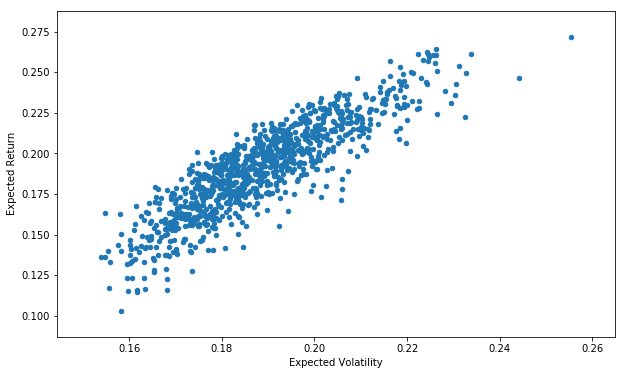

In [163]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

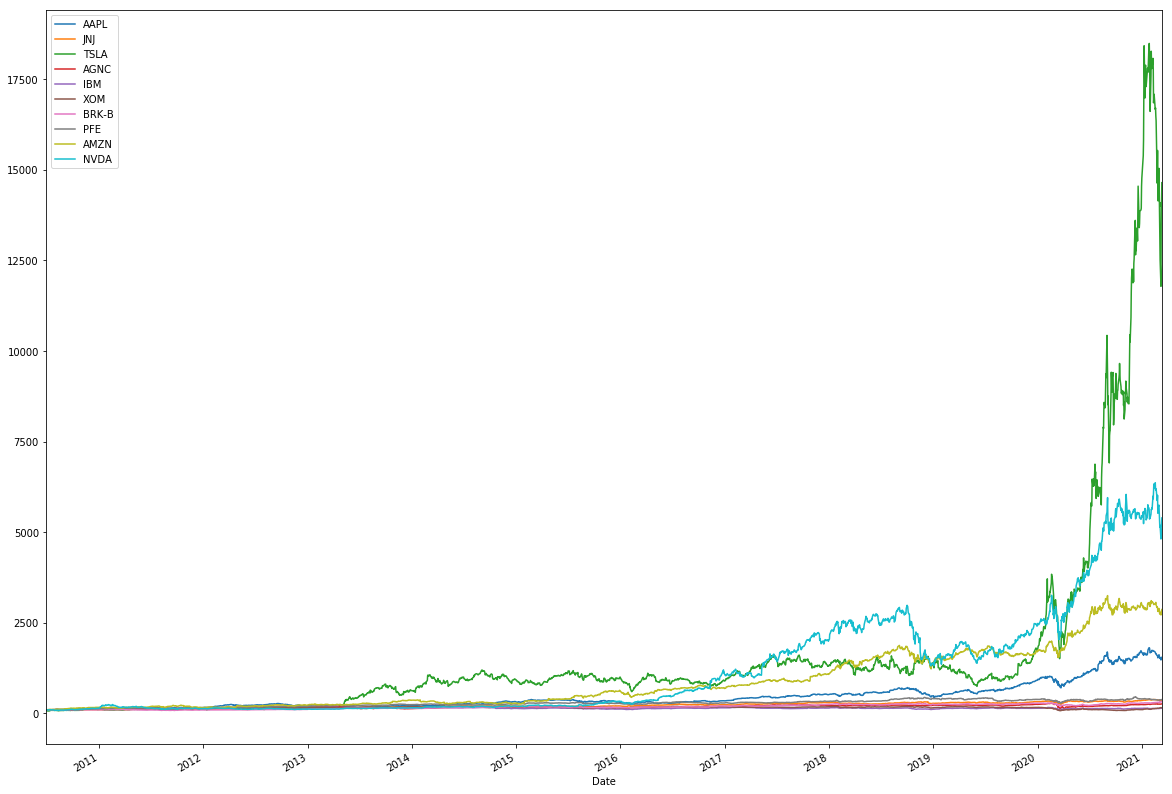

In [164]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

In [165]:
#sns.set_style('whitegrid')
#regression = sns.pairplot(returns[1:], kind="reg")
#regression

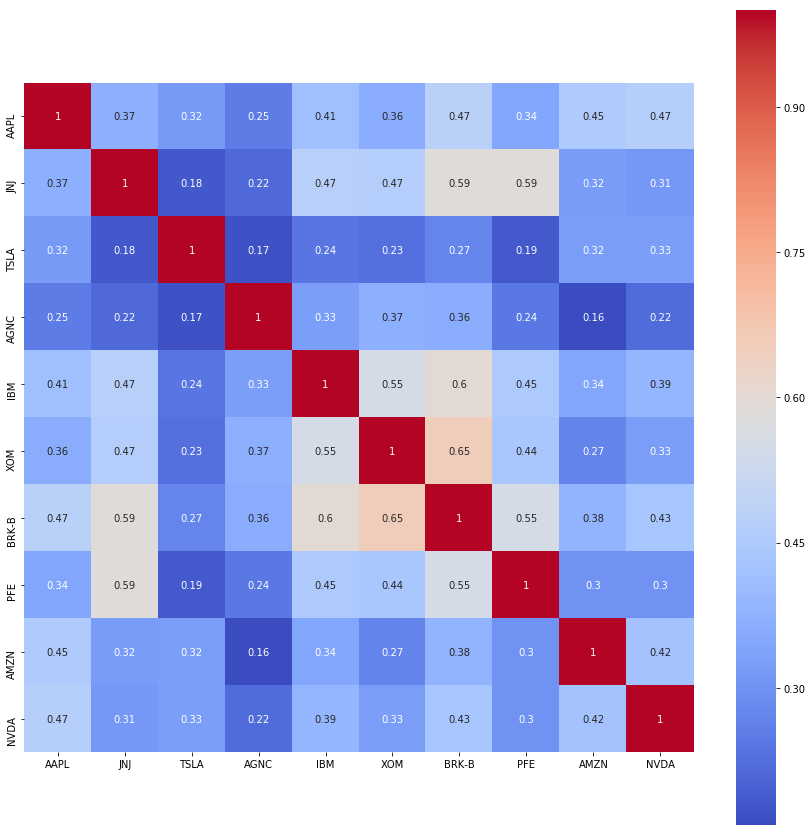

In [166]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap
